# we have Amazon sales data set in which we have to analyse following questions:- 1. which size is selling most? 
 # 2. Most selling categories?
 # 3. Top 10 states contributing in sales ?
 # 4. top 10 cities contributing in sales ?
 # 5. B2B Analysis?
 # 6. Distribution of order status?
 # 7. Order delivered by which service, Amazon or by Merchant?

#                         # starts with importing required libraries and loading our data set

In [290]:
import numpy as np                   
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [334]:
df=pd.read_csv(r'C:\Users\prash\Downloads\Python_Amazon_Sales_Analysis-main\Python_Amazon_Sales_Analysis-main\Amazon Sale Report.csv',encoding='unicode_escape')

In [292]:
df.shape                  # for checking our data set ( no. of rows & columns)

(128976, 21)

In [293]:
df.head()                    # top 5 rows

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [294]:
df.tail()                           # last 5 rows

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [295]:
df.info()                                # complete information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [296]:
df.drop(['New','PendingS'] ,axis=1,inplace=True)          # delete empty columns

In [297]:

df.info()                                                 # cross check of columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [298]:
df.isnull().sum()                                     # to find sum of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [299]:
df.dropna(inplace=True)                                #delete null values 

In [300]:
df.isnull().sum()                                      # cross-check

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [301]:
df.rename(columns={'Qty':'Quantity'})                      # rename column name

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315.0,IN,False,Easy Ship
128876,128875,403-9524128-9243508,06-01-2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,False,Easy Ship
128888,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301.0,IN,False,Easy Ship
128891,128890,407-0116398-1810752,05-31-22,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007.0,IN,False,Easy Ship


In [302]:
df['Date']=pd.to_datetime (df['Date'])          #change data type of date column


In [303]:
df['Date'].dtype                                   # cross check

dtype('<M8[ns]')

In [304]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')                # data type change to integer
df['ship-postal-code'].dtype

dtype('int32')

#  Exploratory data analysis (EDA)

In [306]:
df.columns                       # columns name

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

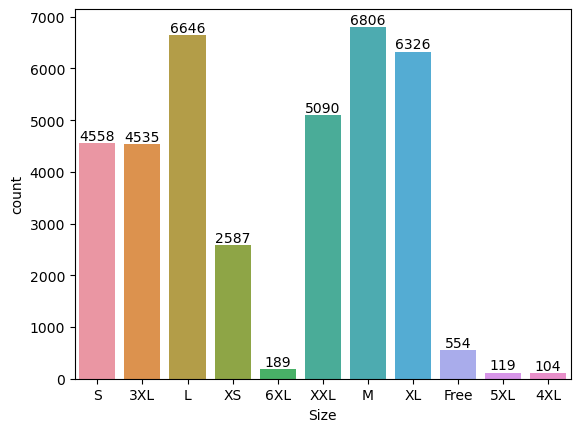

<Figure size 500x500 with 0 Axes>

In [307]:
ax=sns.countplot(x='Size',data=df)               # Q 1. which size is selling most ?
plt.figure(figsize=(5,5))
for bars in ax.containers:
    ax.bar_label(bars)

# from the above graph we can say that M size is sellling most in our data set.

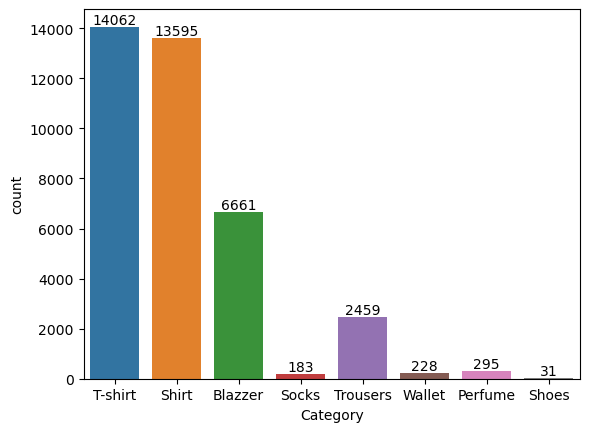

<Figure size 500x500 with 0 Axes>

In [308]:
ax=sns.countplot(x='Category',data=df)
plt.figure(figsize=(5,5))                  # Q2. which is the most selling category?
for bars in ax.containers:
    ax.bar_label(bars)

# here we have T-shirts and shirts are most selling categories.

In [309]:
top_10_states= df['ship-state'].value_counts().head(10).tolist()    # top 10 states contributing in sales?


In [310]:
print(top_10_state)

MAHARASHTRA       6236
KARNATAKA         4550
UTTAR PRADESH     3298
TAMIL NADU        3167
TELANGANA         3136
KERALA            2213
DELHI             1955
WEST BENGAL       1653
ANDHRA PRADESH    1621
Gujarat           1382
Name: ship-state, dtype: int64


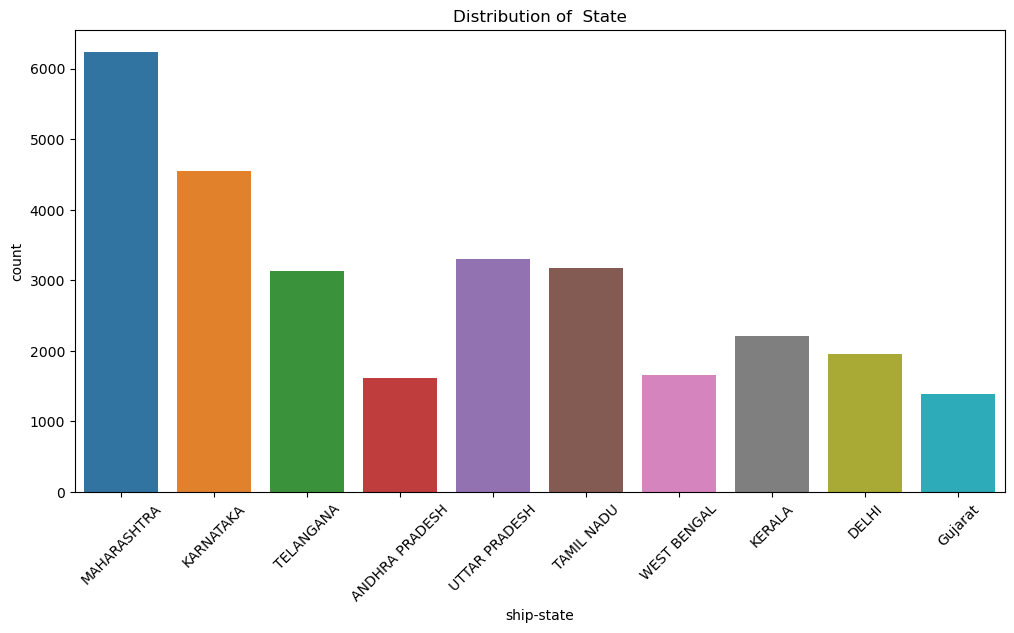

In [311]:
df_top_10 = df[df['ship-state'].isin(top_10_states)]   # for getting names of top 10 states     
top_10_state = df['ship-state'].value_counts().head(10)         # top_10_States


# Plot count of cities by state
plt.figure(figsize=(12, 6))            #figure size
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')             

plt.title('Distribution of  State')                                              
plt.xticks(rotation=45)   #slightly tilt state name
plt.show()           

# Maharashtra , Karnataka ,Telangna ,A.P,U.P, Tamil Nadu, West Bangal, Kerala, Delhi & Gujarat are top 10 states.

In [312]:
top_10_city= df['ship-city'].value_counts().head(10)      # top 10 cities

In [313]:
df_top_10=df[df["ship-city"].isin(top_10_city)]

In [314]:
print(top_10_city)

BENGALURU    2839
HYDERABAD    2190
MUMBAI       1740
NEW DELHI    1672
CHENNAI      1414
PUNE         1082
KOLKATA       660
LUCKNOW       472
GURUGRAM      468
THANE         464
Name: ship-city, dtype: int64


In [315]:
top_10_city = df['ship-city'].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MUMBAI'),
  Text(1, 0, 'BENGALURU'),
  Text(2, 0, 'HYDERABAD'),
  Text(3, 0, 'LUCKNOW'),
  Text(4, 0, 'CHENNAI'),
  Text(5, 0, 'KOLKATA'),
  Text(6, 0, 'PUNE'),
  Text(7, 0, 'GURUGRAM'),
  Text(8, 0, 'NEW DELHI'),
  Text(9, 0, 'THANE')])

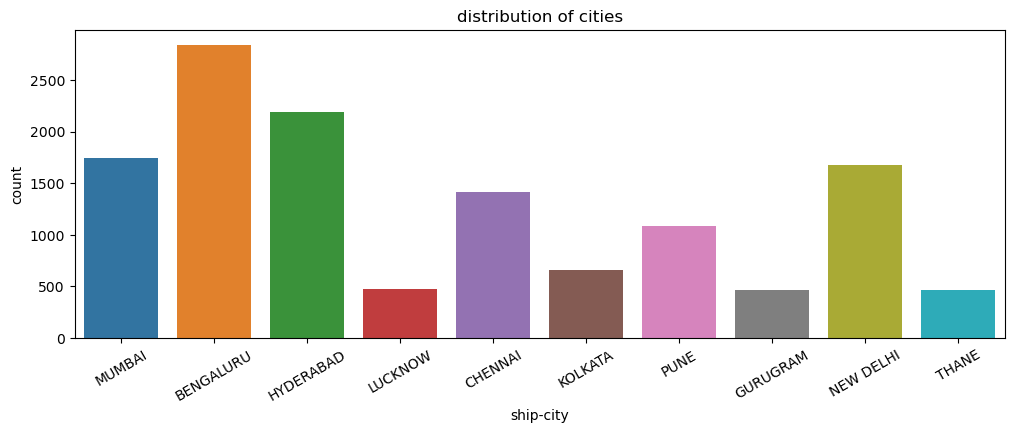

In [316]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df[df['ship-city'].isin(top_10_city.index)], x='ship-city')
plt.title('distribution of cities')
plt.xticks(rotation=30)

# here we have top 10 cities contributing in sales 
#BENGALURU    2839
#HYDERABAD    2190
#MUMBAI       1740
#NEW DELHI    1672
#CHENNAI      1414
#PUNE         1082
#KOLKATA       660
#LUCKNOW       472
#GURUGRAM      468
#THANE         464

In [317]:
df.describe(include ='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


(-1.0999999944996224,
 1.0999999997380772,
 -1.0999999831481648,
 1.0999999984427207)

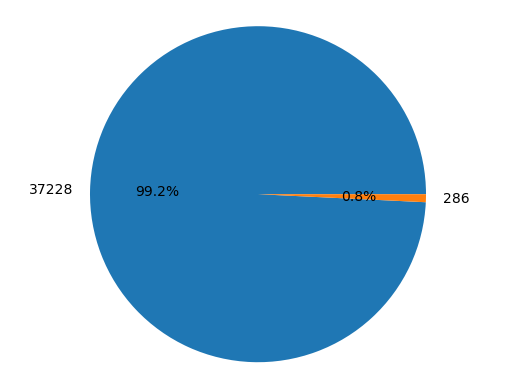

In [322]:
B2B_check= df['B2B'].value_counts()              # Q6   B2B ananlysis?
plt.pie(B2B_check,labels= B2B_check,autopct='%2.1f%%')
plt.axis('equal')

# 99.2% customers are retailers 

In [323]:
print(df['Status'])                         #6 Distribution of order status 

0                            Cancelled
1         Shipped - Delivered to Buyer
3                            Cancelled
7         Shipped - Delivered to Buyer
12        Shipped - Delivered to Buyer
                      ...             
128875    Shipped - Delivered to Buyer
128876                       Cancelled
128888    Shipped - Delivered to Buyer
128891                       Cancelled
128892    Shipped - Delivered to Buyer
Name: Status, Length: 37514, dtype: object


In [324]:
filtered_Status= df['Status'].value_counts()           # firts calculate value count of each order status
print(filtered_Status)

Shipped - Delivered to Buyer     28741
Cancelled                         5131
Shipped - Returned to Seller      1948
Shipped - Picked Up                973
Pending - Waiting for Pick Up      281
Pending                            243
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64


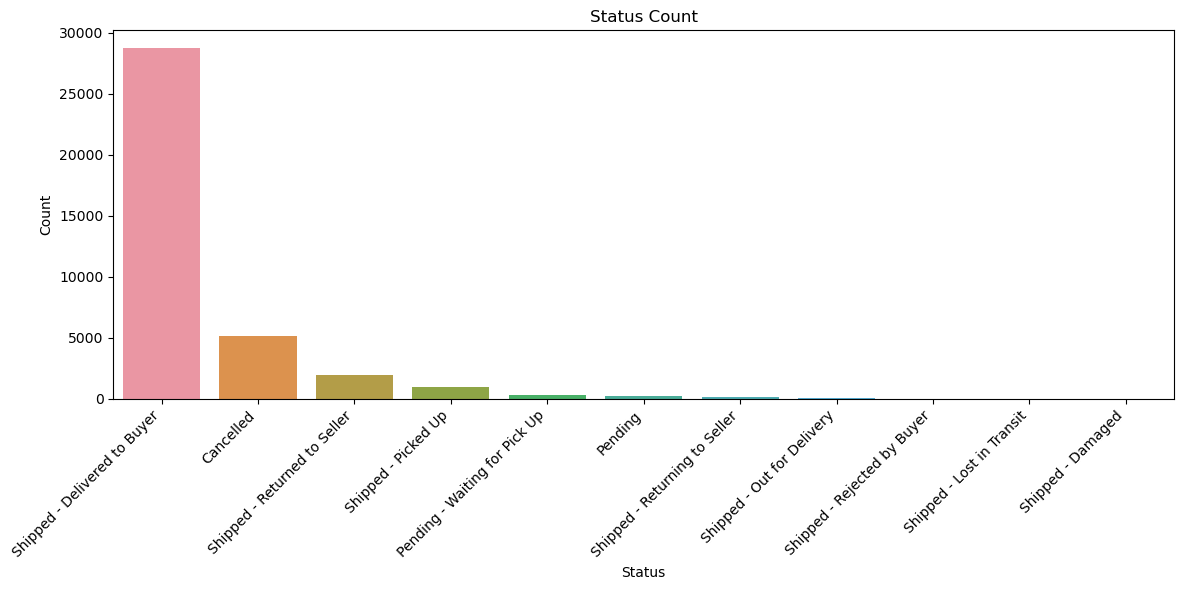

In [327]:
# Create a DataFrame with the provided data
data = {
    "Status": [
        "Shipped - Delivered to Buyer",
        "Cancelled",
        "Shipped - Returned to Seller",
        "Shipped - Picked Up",
        "Pending - Waiting for Pick Up",
        "Pending",
        "Shipped - Returning to Seller",
        "Shipped - Out for Delivery",
        "Shipped - Rejected by Buyer",
        "Shipped - Lost in Transit",
        "Shipped - Damaged"
    ],
    "Count": [
        28741, 5131, 1948, 973, 281, 243, 145, 35, 11, 5, 1
    ]
}

df = pd.DataFrame(data)

# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Status', y='Count', data=df)

# Add labels to the bars
#for p in ax.patches:
   # ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



# company is having good sales as , order status , delivered to buyer is most in numbers . 

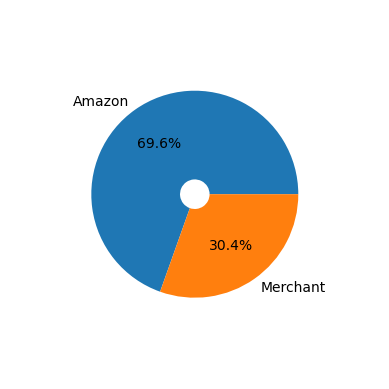

In [335]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()                       # fullfillments 

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()


#  From above chart you can see that most of the Fulfilment are amazon

# The data analysis reveals that the business has a significant customer base  Mumbai in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers with good deliverey rate 
